In [8]:
def trade(start_date,end_date): 
    # Configure plotting in Jupyter
    from matplotlib import pyplot as plt
    %matplotlib inline
    plt.rcParams.update({
        'figure.figsize': (15, 15),
        'axes.spines.right': False,
        'axes.spines.left': False,
        'axes.spines.top': False,
        'axes.spines.bottom': False})
    # Seed random number generator
    from numpy import random as nprand
    seed = hash("Network Science in Python") % 2**32
    nprand.seed(seed)
    import datetime
    import networkx as nx
    import pandas as pd
    
    start_date = datetime.datetime.strptime(start_date,'%Y/%m/%d')
    end_date = datetime.datetime.strptime(end_date,'%Y/%m/%d')
    G = nx.DiGraph()
    # Load data file into network
    from pathlib import Path
    data_dir = Path('.')
    #按机构类别顺序生成节点
    with open(data_dir / '质押式回购交易明细.csv') as f:
        # Parse header
        title = next(f).strip().split(",")
        date_idx=title.index('日切日期')
        buyer_idx=title.index('正回购方持有人账号')
        buyertype_idx=title.index('正回购方机构类别')
        seller_idx=title.index('逆回购方持有人账号')
        sellertype_idx=title.index('逆回购方机构类别')
        amount_idx=title.index('首期结算金额（亿元）')
        #节点集合
        nodeset=set()
        #机构类别字典的主键和值
        key=[]
        value=[]
        # Parse rows
        for row in f:
            parts = row.strip().split(",")
            trade_date=datetime.datetime.strptime(parts[date_idx],'%Y/%m/%d')
            if trade_date>=start_date and trade_date<=end_date:        
                nodeset.add(parts[seller_idx])
                nodeset.add(parts[buyer_idx])
                key.append(parts[seller_idx])
                value.append(parts[sellertype_idx])
                key.append(parts[buyer_idx])
                value.append(parts[buyertype_idx])
        lookup=dict(zip(key,value))
        nodes=sorted(list(nodeset),key=lambda x: lookup[x])
        for n in nodes:
            G.add_node(n)
            G.nodes[n]['type']=lookup[n]
    #生成边
    with open(data_dir / '质押式回购交易明细.csv') as f:    
        title = next(f).strip().split(",")
        date_idx=title.index('日切日期')
        buyer_idx=title.index('正回购方持有人账号')
        buyertype_idx=title.index('正回购方机构类别')
        seller_idx=title.index('逆回购方持有人账号')
        sellertype_idx=title.index('逆回购方机构类别')
        amount_idx=title.index('首期结算金额（亿元）')
        for row in f:
            parts = row.strip().split(",")
            trade_date=datetime.datetime.strptime(parts[date_idx],'%Y/%m/%d')
            if trade_date>=start_date and trade_date<=end_date:        
                try:
                    G.edges[parts[seller_idx],parts[buyer_idx]]['amount'] += float(parts[amount_idx])
                except KeyError:
                    # Edge doesn't exist, create it
                    G.add_edge(parts[seller_idx],parts[buyer_idx],amount=float(parts[amount_idx]))
    #根据机构类别给节点上色
    typelist=['证券公司','城市商业银行','银行理财产品','职业年金','证券投资基金','农商行和农合行','养老基金','证券公司资产管理计划'\
              ,'基金管理公司及其子公司特定客户资产管理计划','财务公司','企业年金','邮政储蓄银行','保险资产管理计划','股份制商业银行'\
              ,'保险产品','社保基金','养老金产品','保险公司','农信社及联社','其他特殊机构','托管人','私募投资基金','信托计划',\
              '保险保障基金','资产管理公司','外资银行分行','其他存款类金融机构','期货公司资产管理产品','国有控股商业银行','期货公司'\
              ,'境外参加银行','投资咨询类公司','外资银行法人','村镇银行','金融租赁公司','信托公司','境外人民币清算行','保险资产管理公司'\
              ,'政策性银行','其他非法人类产品']
    node_color = []
    for n in G.nodes:
        node_color.append(get_color(typelist.index(G.nodes[n]['type'])))
    
#     max_amount = max([G.edges[e]['amount'] for e in G.edges])
    weight=[G.edges[e]['amount'] for e in G.edges]
#     pos=nx.spring_layout(G)
#     nx.draw_networkx_nodes(G, pos=pos, node_color=node_color, with_labels=True)
#     nx.draw_networkx_edges(G, pos=pos,width=3,edge_color=weight,edge_cmap=plt.cm.Blues, alpha=0.5)
#     nx.draw_networkx_labels(G,pos=pos)
    nx.draw_networkx(G,node_size=0,edge_color=weight,edge_cmap=plt.cm.Blues,alpha=0.1)
    plt.show()

In [3]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

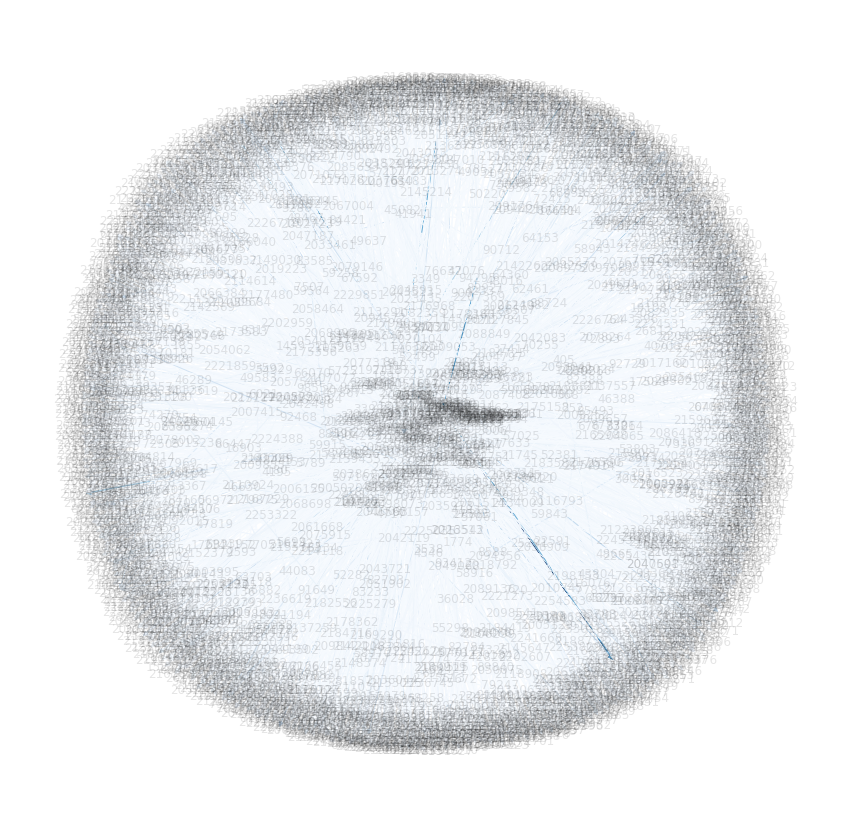

In [9]:
trade("2020/2/3","2020/2/3")